# Huang Transform on spatially binned signals
#### Asymmetric nonG

## Set parameters

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as grd
import modules.peaks as px
import modules.fouriertransform as ft
import modules.correlationfunctions as cf
import modules.gaussianfield as grf
import modules.filters as flt
# import nbodykit.lab as nbkt
import scipy.interpolate as interpolate
import scipy.signal as signal
import scipy.stats as stats

import tftb as tf
from pyhht import EMD
from pyhht.visualization import plot_imfs

from sklearn.decomposition import FastICA
import numpy as np
import matplotlib.pyplot as plt
import modules.colorednoise as cn
import ica_test_Jonathan as ica

# Parameters
logtwo_N = 15
N = 2**logtwo_N
BoxSize = 512.0
dx = BoxSize/N
h = 0.695
k0 = 0.02 
A0 = (7.96*10**-10)# * 2*np.pi**2)
ns = 0.965
seed = 50
dk = (2*np.pi) / BoxSize # Bin size (for power spectrum)
Pk = lambda k: A0*(k/k0)**(ns-1)*k**-3

# Other NG parameters
alpha = 1.0
nu = 2
c, w = 2, .2

In [8]:
# Generate the grfs using gaussianfield
g = grf.gaussian_random_field_1D(N, BoxSize=N, seed=seed)
f = grf.gaussian_random_field_1D(N, BoxSize=N, seed=10000)

## Generate nonG fields

In [9]:
# Generate nonG fields

# Extract the standard deviation of the gaussian fields
s = g.std()
sf = f.std()

# Generate the non-gaussian components that will be added to the gaussian fields
# Note that 'g' is the field used to generate the NG components, so the NG
# is correlated with 'g', and 'f' is a different Gaussian random field with
# which the NG is uncorrelated
NG_symsinh = px.map_sinh(g, nu*s, alpha) - g
NG_asymsinh = px.map_asymm_sinh(g, nu*s, alpha) - g
NG_smooth_bump = px.map_smooth_bump(g, c, w) - g
NG_squared = g**2 - g

# Generate the correlated NG zeta fields 
zeta_NG_symsinh = g + NG_symsinh
zeta_NG_asymsinh = g + NG_asymsinh
zeta_NG_smooth_bump = g + NG_smooth_bump
zeta_NG_squared = g + g**2

# Generate the uncorrelated NG zeta fields 
zeta_NG_symsinh_uncorr = f + NG_symsinh
zeta_NG_asymsinh_uncorr = f + NG_asymsinh
zeta_NG_smooth_bump_uncorr = f + NG_smooth_bump
zeta_NG_squared_uncorr = f + g**2

# Test the asymmetric sinh function applied to a linear function tf
tf = np.linspace(-4, 4, N)
zeta_NG_asymsinh_test = px.map_asymm_sinh(tf, nu*s, alpha) - tf

# Generate gaussian distribution from mean and std of NG zeta fields
# ???

## Why are we getting an error for invalid value in power?

## Setup 

In [10]:
# Note that 'g' is the field used to generate the NG component called 'NG_asymsinh', 
# so 'NG_asymsinh' is correlated with 'g', and 'f' is a different Gaussian random 
# field with which the 'NG_asymsinh' is uncorrelated. 

source_g = f
source_ng = NG_asymsinh
size_field = source_g.size
correlated = False

source = source_g + source_ng

decomposer = EMD(source)
imfs = decomposer.decompose()

Mode 10, Iteration 600
0 minima > 0; 27 maxima < 0.
Mode 12, Iteration 800
0 minima > 0; 7 maxima < 0.


(15, 32768)
2
3
4
5
6
7
8
9
10
11
12
13
14
15


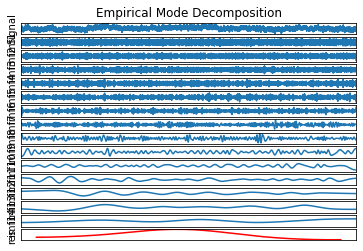

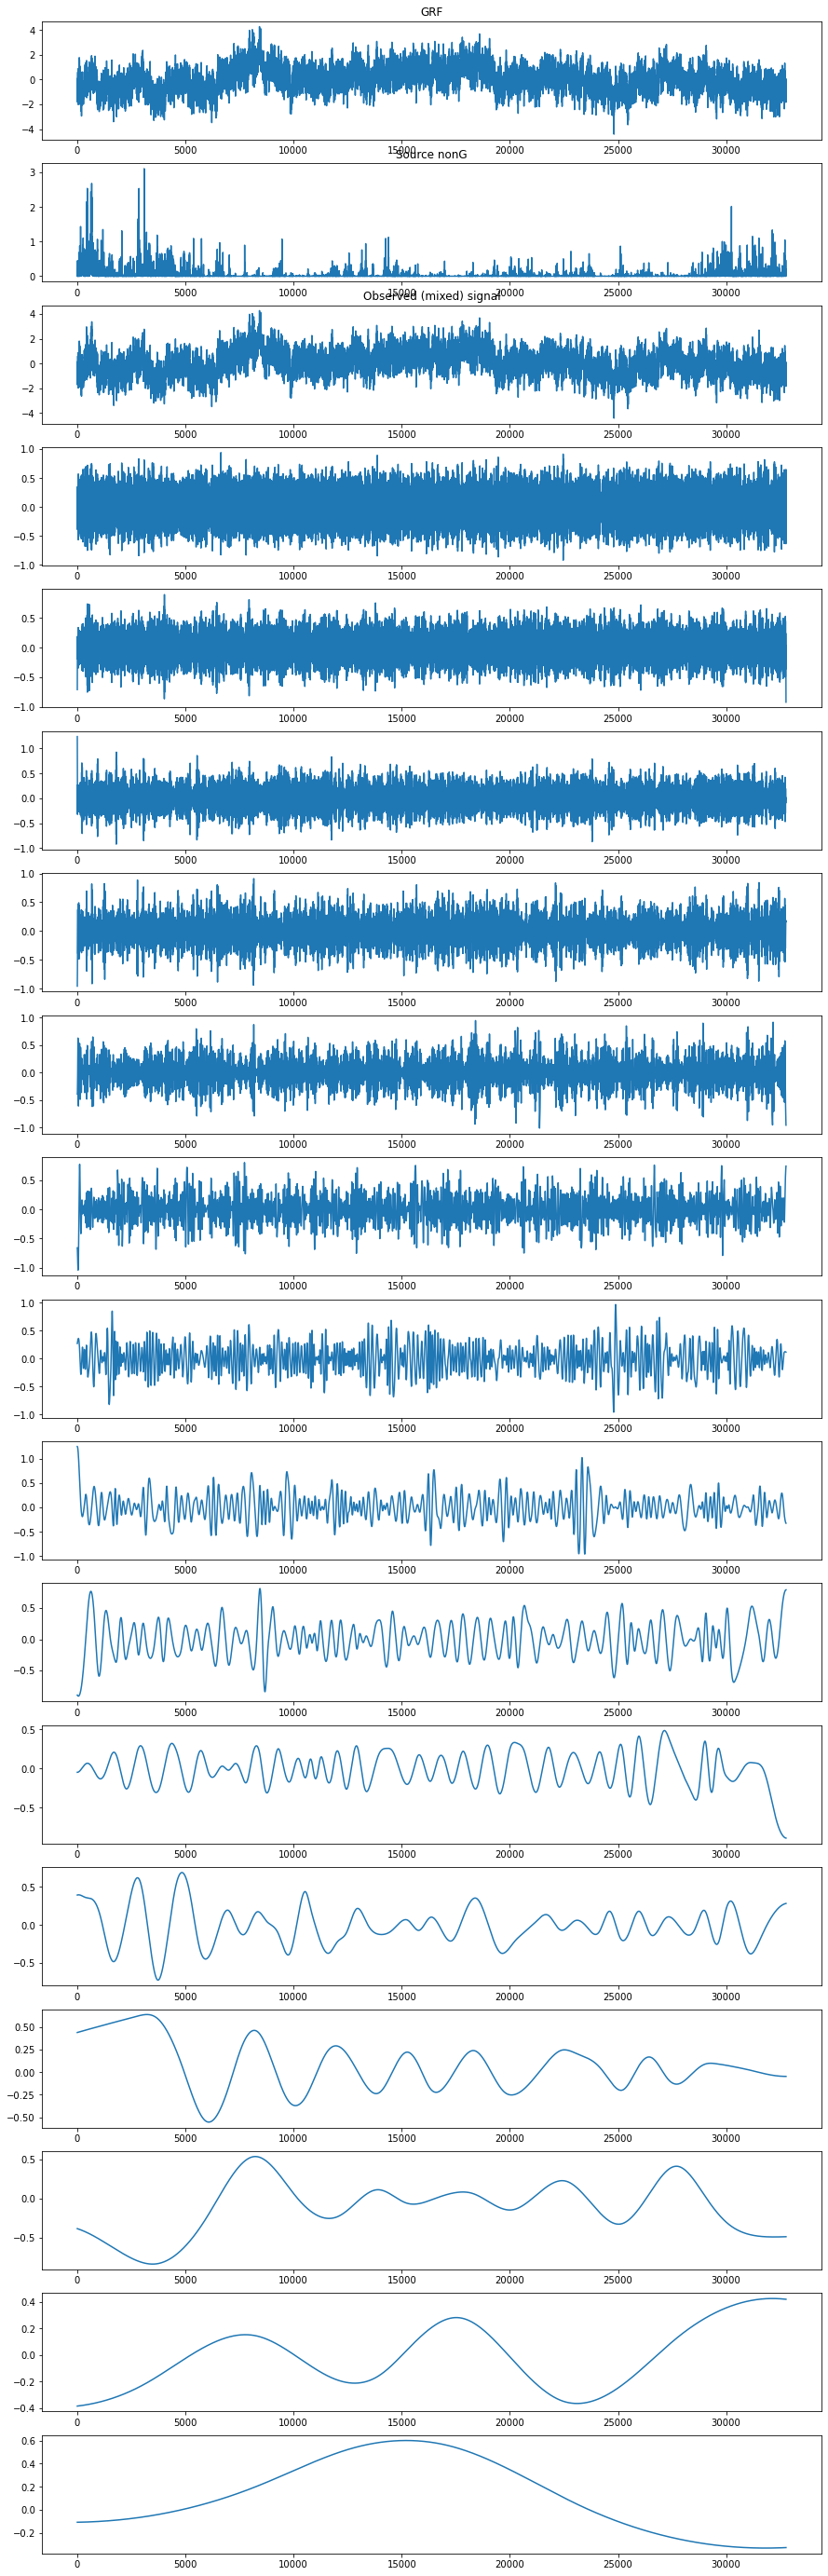

In [11]:
print(imfs.shape)

plot_imfs(source, imfs) 

fig, axs = plt.subplots(18,1,figsize=(15,50))
# plt.suptitle('Identical Peaks with Varying Width, Amplitude=1, and White Noise')

axs[0].set_title("GRF")
axs[0].plot(source_g)

axs[1].set_title("Source nonG")
axs[1].plot(source_ng)

axs[2].set_title("Observed (mixed) signal")
axs[2].plot(source)

for j in range(15):
#     axs[j].set_title(r'ICA separated signals (num observed signals $=$ num source signals $-$ {0})'.format(j))
    axs[j+3].plot(imfs[j,:])